In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [10]:
astro_filename = "./data/astro.csv"
atmos_filename = "./data/atmosph.csv"

In [11]:
astro_data = np.loadtxt(astro_filename, delimiter=",")
atmos_data = np.loadtxt(atmos_filename, delimiter=",")

In [7]:
print(astro_data)

[[5.26190476e-01 1.28227513e-04]
 [5.54761905e-01 2.91600814e-04]
 [6.11904762e-01 6.08187596e-04]
 [6.64285714e-01 1.13851309e-03]
 [7.16666667e-01 1.95469865e-03]
 [7.88095238e-01 3.35599725e-03]
 [8.69047619e-01 5.40000754e-03]
 [9.88095238e-01 9.07290741e-03]
 [1.09761905e+00 1.25484923e-02]
 [1.25952381e+00 1.69842725e-02]
 [1.43571429e+00 1.97594407e-02]
 [1.65952381e+00 2.20152187e-02]
 [1.88809524e+00 2.24963819e-02]
 [2.17380952e+00 2.06326015e-02]
 [2.51190476e+00 1.73554796e-02]
 [2.86904762e+00 1.39810538e-02]
 [3.14523810e+00 1.12627175e-02]
 [3.47380952e+00 9.27120428e-03]
 [3.82142857e+00 6.55996328e-03]]


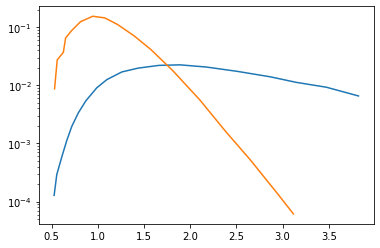

In [12]:
plt.semilogy(astro_data[:, 0], astro_data[:, 1])
plt.semilogy(atmos_data[:, 0], atmos_data[:, 1])

In [64]:
new_energy = np.linspace(0.5, 4.0, 1000)

In [65]:
f_astro = scipy.interpolate.interp1d(astro_data[:, 0], astro_data[:, 1], bounds_error=False, fill_value="extrapolate")
f_atmos = scipy.interpolate.interp1d(atmos_data[:, 0], atmos_data[:, 1], bounds_error=False, fill_value="extrapolate")

In [66]:
astro_flux = f_astro(new_energy)
atmos_flux = f_atmos(new_energy)

(0.0, 5.0)

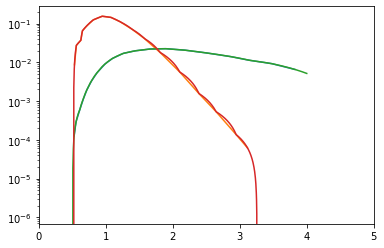

In [68]:
plt.semilogy(astro_data[:, 0], astro_data[:, 1])
plt.semilogy(atmos_data[:, 0], atmos_data[:, 1])
plt.semilogy(new_energy, astro_flux)
plt.semilogy(new_energy, atmos_flux)
plt.xlim(0, 5)

In [69]:
astro_flux[astro_flux < 0] = 0
atmos_flux[atmos_flux < 0] = 0

(array([1387., 3258., 2719., 1525.,  686.,  279.,   94.,   36.,   10.,
           6.]),
 array([0.52452452, 0.78483483, 1.04514515, 1.30545546, 1.56576577,
        1.82607608, 2.08638639, 2.3466967 , 2.60700701, 2.86731732,
        3.12762763]),
 <BarContainer object of 10 artists>)

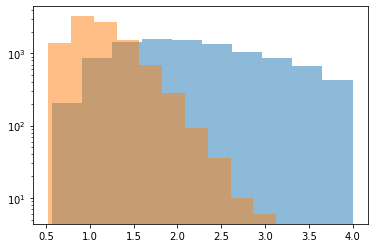

In [73]:
plt.hist(np.random.choice(new_energy, p = astro_flux / np.sum(astro_flux), size=10000), log=True, alpha=0.5)
plt.hist(np.random.choice(new_energy, p = atmos_flux / np.sum(atmos_flux), size=10000), log=True, alpha=0.5)

In [75]:
mc_background_energies = np.random.choice(new_energy, p = atmos_flux / np.sum(atmos_flux), size=10000)
mc_signal_energies = np.random.choice(new_energy, p = astro_flux / np.sum(astro_flux), size=10000)

In [84]:
mc_energies = np.random.choice(new_energy, p = (atmos_flux + astro_flux) / np.sum(atmos_flux + astro_flux), size=10000)
mc_signal = np.zeros(len(mc_energies), dtype=bool)
for i, eng_ in enumerate(mc_energies):
    prob_astro = f_astro(eng_) 
    prob_atmos = f_atmos(eng_)

    if(prob_astro < 0):
        prob_astro = 0
    if(prob_atmos < 0):
        prob_atmos = 0
    if(prob_astro == 0 and prob_atmos == 0):
        prob_astro = 0.5
        prob_atmos = 0.5
    else:
        norm = prob_astro + prob_atmos
        prob_astro /= norm
        prob_atmos /= norm
    mc_signal[i] = np.random.choice([False, True], p=[prob_atmos, prob_astro])

(array([9.510e+02, 2.207e+03, 1.944e+03, 1.093e+03, 5.330e+02, 2.150e+02,
        7.800e+01, 2.900e+01, 1.000e+01, 2.000e+00]),
 array([0.52452452, 0.77607608, 1.02762763, 1.27917918, 1.53073073,
        1.78228228, 2.03383383, 2.28538539, 2.53693694, 2.78848849,
        3.04004004]),
 <BarContainer object of 10 artists>)

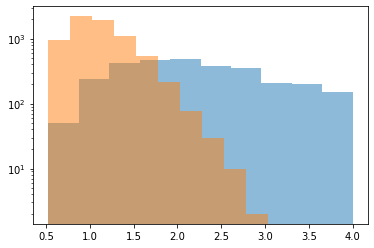

In [86]:
plt.hist(mc_energies[mc_signal], log=True, label="Signal", alpha=0.5)
plt.hist(mc_energies[np.logical_not(mc_signal)], log=True, label="Background", alpha=0.5)

In [89]:
n_signal = sum(mc_signal)
n_background = len(mc_signal) - n_signal

In [91]:
background_ra = np.random.uniform(0, 360, size=n_background)
background_dec = np.random.uniform(-90, 90, size=n_background)

In [98]:
signal_ra = np.random.normal(180, 20, size=n_signal)
signal_dec = np.random.normal(0, 20, size=n_signal)

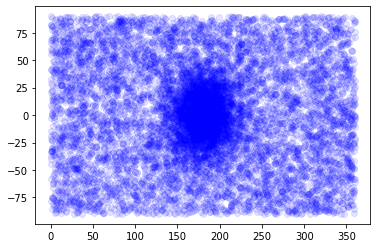

In [100]:
plt.scatter(background_ra, background_dec, color = 'blue', alpha = 0.1)
plt.scatter(signal_ra, signal_dec, color = 'blue', alpha = 0.1)

In [ ]:
plt.scatter(background_ra, background_dec, color = 'blue', alpha = 0.1)
plt.scatter(signal_ra, signal_dec, color = 'blue', alpha = 0.1)

In [102]:
background_energy = mc_energies[np.logical_not(mc_signal)]
signal_energy = mc_energies[mc_signal]

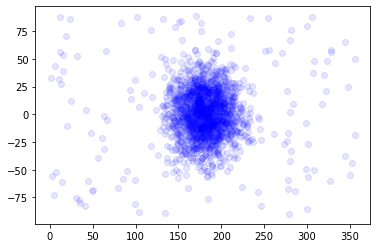

In [109]:
energy_cut = 2.0
plt.scatter(background_ra[background_energy > energy_cut], background_dec[background_energy > energy_cut], color = 'blue', alpha = 0.1)
plt.scatter(signal_ra[signal_energy > energy_cut], signal_dec[signal_energy > energy_cut], color = 'blue', alpha = 0.1)